In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

%config InlineBackend.figure_format = 'retina'
sns.set_context('talk')

In [155]:
# When evaluating accuracy, each batch will have this many samples.
batch_size = 300
x = np.random.randint(low=0, high=2, size=batch_size)

# In this simulation, the target variable is the feature itself.
# In order to simulate errors, the models will output the feature
# varible back with certain probability, but not always.
x = y

x.shape, y.shape, x[:10]

((500,), (500,), array([1, 0, 1, 0, 0, 1, 0, 0, 0, 1]))

In [143]:
def accuracy(y, y_hat):
    return (y == y_hat).mean()


def weak_predictor(batch_x, strength=0.7, seed=None):
    """
    Returns x with given probability, and !x otheriwse.
    
    Sample accuracy follows the Bernoulli distribution.
    Batch accuracy follows the binomial distribution.
    
    :param strength: probability for the Bernoulli distribution
    """
    y_hat = np.empty(shape=x.shape, dtype=int)
    
    np.random.seed(seed)
    correct_mask = np.random.rand(x.shape[0]) < strength
    
    y_hat[correct_mask] = x[correct_mask]
    y_hat[~correct_mask] = 1 - x[~correct_mask]
    
    return y_hat

In [166]:
accuracy(y, weak_predictor(x)), weak_predictor(x)[:10]

(0.67, array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1]))

In [94]:
def evaluate_predictor(predictor, simulations = 1000):
    scores = np.array([
        accuracy(y, predictor(x))
        for s in range(simulations)
    ])
    
    return scores

In [167]:
evaluate_predictor(weak_predictor).mean()

0.7002619999999999

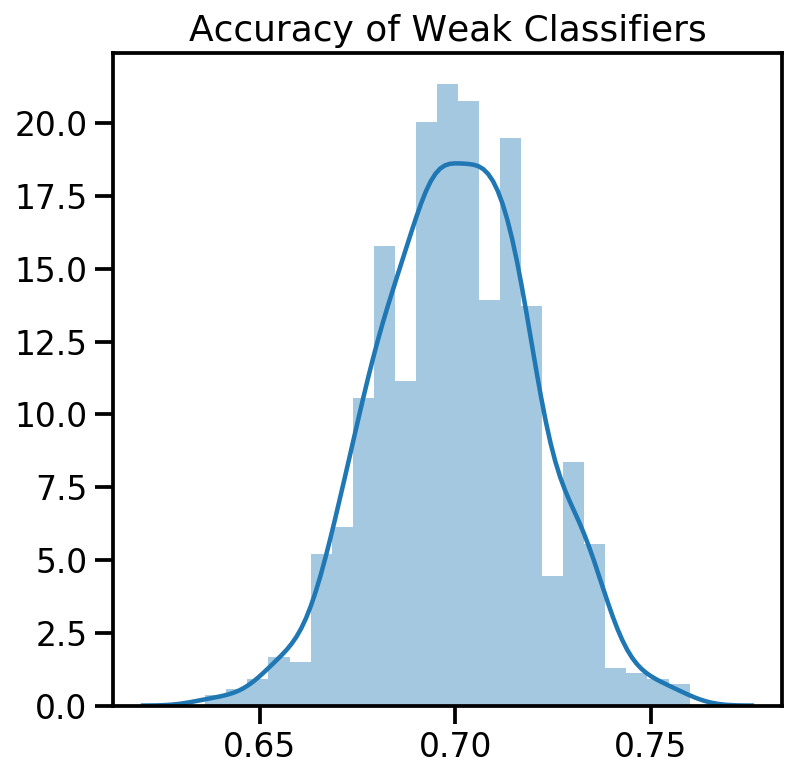

In [180]:
weak_scores = evaluate_predictor(weak_predictor)
plt.figure(figsize=[6, 6])
sns.distplot(weak_scores)
plt.title('Accuracy of Weak Classifiers')
plt.show()

In [171]:
def ensemble_weak_predictor(batch_x, strength, size):
    """
    Builds an ensemble of weak predictors.
    For each sample in batch, outputs 1 if more than half
    of the weak predictors output 1, and 0 otherwise.
    """
    
    predictions = np.array([
        weak_predictor(batch_x, strength)
        for _ in range(size)
    ])
    
    y_hat = (predictions.mean(axis=0) > 0.5).astype(int)
    
    return y_hat

In [172]:
ensemble_weak_predictor(x, strength=0.7, size=10)[:10]

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 1])

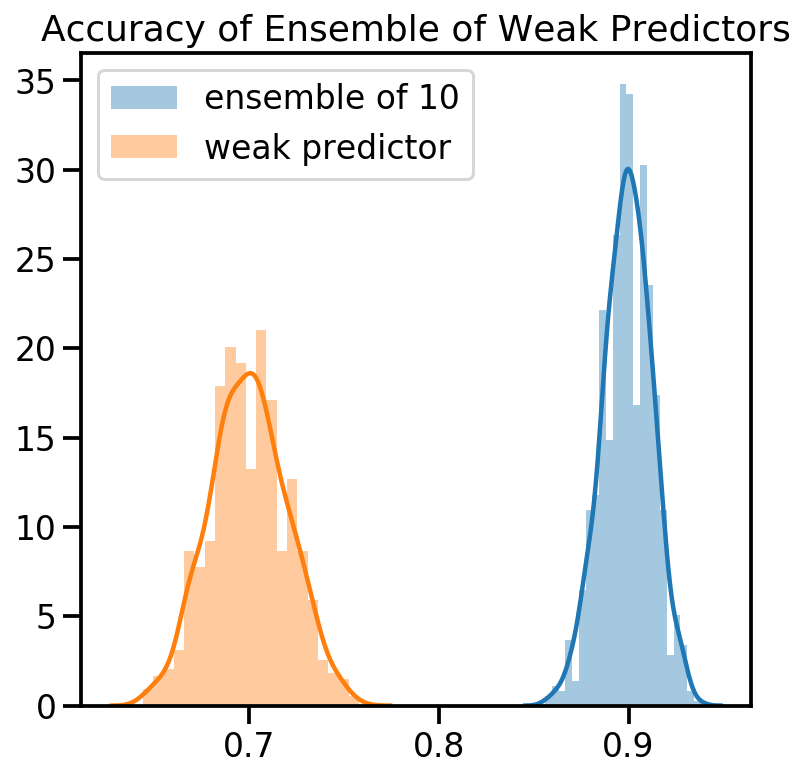

In [175]:
ensemble_weak_scores = evaluate_predictor(
    lambda x: ensemble_weak_predictor(x, strength=0.7, size=10)
)

plt.figure(figsize=[6, 6])
sns.distplot(ensemble_weak_scores, label='ensemble of 10')
sns.distplot(weak_scores, label='weak predictor')
plt.title('Accuracy of Ensemble of Weak Predictors')
plt.legend()
plt.show()

In [118]:
strength_curve = pd.DataFrame()
strength_curve['member accuracy'] = np.linspace(0, 1, 10)
strength_curve['ensemble accuracy'] = [
    evaluate_predictor(
        lambda x: ensemble_weak_predictor(x, strength, size=10)
    ).mean()
    for strength in strength_curve['member accuracy']
]
strength_curve.round(2)

,member accuracy,ensemble accuracy
0,0.00,0.00
1,0.11,0.00
2,0.22,0.03
3,0.33,0.14
4,0.44,0.36
5,0.56,0.63
6,0.67,0.85
7,0.78,0.97
8,0.89,1.00
9,1.00,1.00


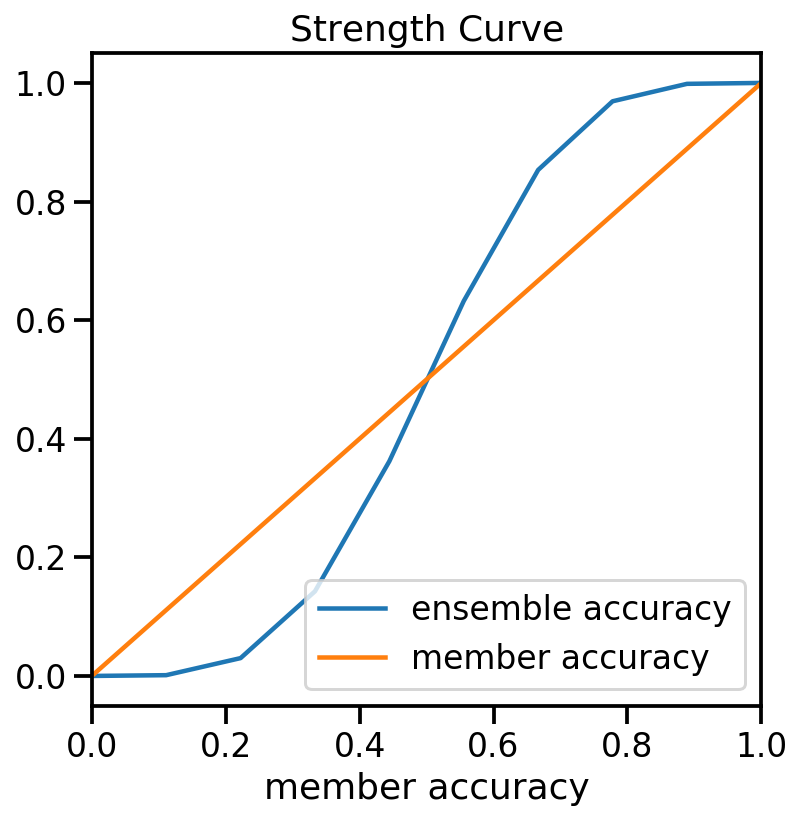

In [179]:
strength_curve.plot('member accuracy', 'ensemble accuracy', figsize=[6, 6])
plt.plot([0, 1], [0, 1], label='member accuracy')
plt.title('Strength Curve')
plt.legend(loc='lower right')

In [125]:
size_curve = pd.DataFrame()
size_curve['ensemble size'] = np.arange(2, 100, 5)
size_curve['ensemble accuracy'] = [
    evaluate_predictor(
        lambda x: ensemble_weak_predictor(x, strength=0.7, size=size)
    ).mean()
    for size in size_curve['ensemble size']
]
size_curve.round(2)

,ensemble size,ensemble accuracy
0,2,0.69
1,7,0.87
2,12,0.92
3,17,0.96
4,22,0.97
5,27,0.99
6,32,0.99
7,37,0.99
8,42,1.00
9,47,1.00


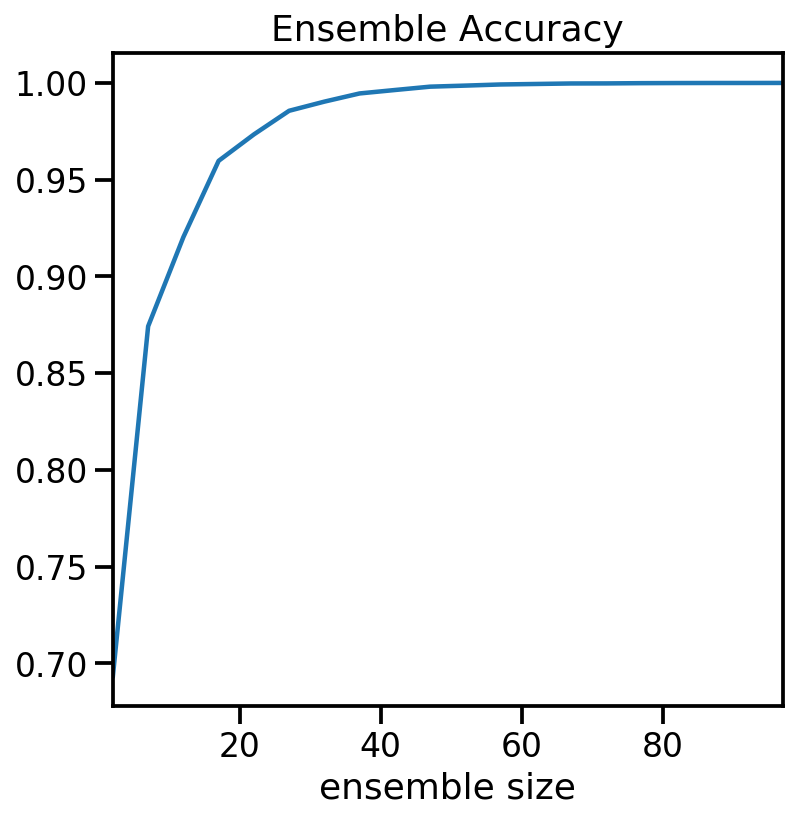

In [177]:
size_curve.plot(
    x='ensemble size', 
    y='ensemble accuracy', 
    figsize=[6, 6], 
    legend=False, 
    title='Ensemble Accuracy'
)
plt.show()

In [181]:
from scipy.stats import multivariate_normal

In [207]:
n_vars = 5
cov = np.random.uniform(0.2, 0.3,
means = np.repeat(0, repeats=n_vars)
covs = np.repeat(np.repeat(cov, repeats=n_vars), repeats=n_vars).reshape(n_vars, n_vars)
covs = np.identity(n_vars) + covs * (1 - np.identity(n_vars))

rv = multivariate_normal(mean=means, cov=covs)
dots = pd.DataFrame(data=[rv.rvs() for _ in range(1000)])

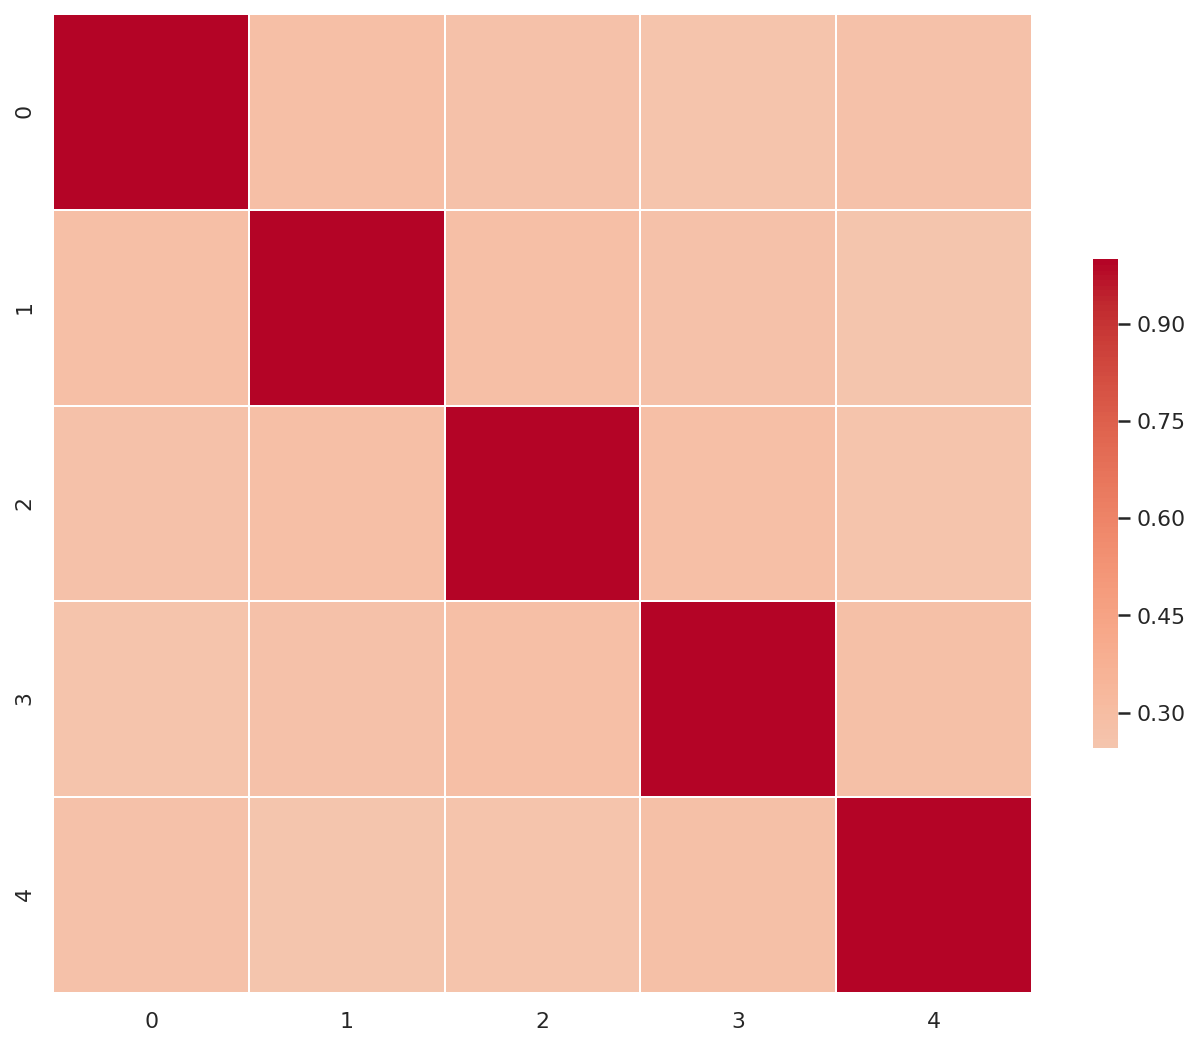

In [210]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")
corr = dots.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(
    corr, 
#     mask=mask, 
    cmap='coolwarm', 
    center=0,
    square=True, 
    linewidths=.5, 
    cbar_kws={"shrink": .5}
)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


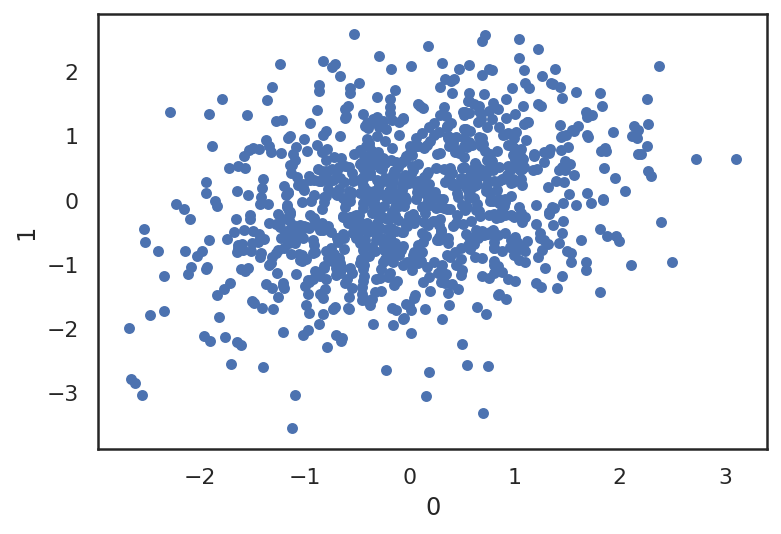

In [211]:
dots.plot(x=0, y=1, kind='scatter')